In [2]:
import sympy as sym
from sympy.vector import CoordSys3D, Del
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.optimize import fsolve, root
# import sympy.vector

符号初始化

In [3]:
# 坐标系初始化
N = CoordSys3D('N')
x = N.x
y = N.y
z = N.z

In [4]:
from sympy.abc import k,l,m,kappa,M,S,h
S0 = sym.symbols('S0')
kH = sym.symbols('kH')

In [5]:
kH      = sym.sqrt(k**2 + l**2)
kappa   = sym.sqrt(kH**2 + m**2)
S = S0 * sym.cos(k*x) * sym.cos(l*y) * sym.sin(m*z)
# 基本风分量
u_basic = M * sym.sin(kappa*(z-h/2))
v_basic = M * sym.cos(kappa*(z-h/2))

In [6]:
# 扰动风分量
u_d = sym.diff(S,z,x) - kappa*sym.diff(S,y)
v_d = sym.diff(S,z,y) - kappa*sym.diff(S,x)
w_d = kH**2 * S

In [7]:
V_basic = N.i * u_basic + N.j * v_basic     # 基本风矢量
V_d     = N.i * u_d + N.j * v_d + N.k * w_d # 扰动风矢量
V_allin = V_basic + V_d                     # 全风场矢量

In [8]:
delop = Del()
curl_V_d     = delop.cross(V_d,     doit = True)  # 基本风涡度
curl_V_basic = delop.cross(V_basic, doit = True)  # 扰动风涡度
curl_V_allin   = delop.cross(V_allin, doit = True)# 全风场涡度V_allinV_allinV_allin


## 1 基本风矢量 和 水平涡度 之间的关系 及螺旋度的空间变化：

## 基本风矢量和水平涡度的夹角

In [9]:
sym.simplify(curl_V_basic.dot(V_basic)/sqrt(curl_V_basic.dot(curl_V_basic))/sqrt(V_basic.dot(V_basic)))

M**2*sqrt(k**2 + l**2 + m**2)/(sqrt(M**2*(k**2 + l**2 + m**2))*sqrt(M**2))

In [10]:
curl_V_basic.dot(V_basic).subs({k:sym.pi/h,l:sym.pi/h,m:sym.pi/h}).subs({h:15000,M:15,S0:2.25*1e9/sym.pi**2})

3*sqrt(3)*pi*sin(sqrt(3)*pi*(N.z - 7500)/15000)**2/200 + 3*sqrt(3)*pi*cos(sqrt(3)*pi*(N.z - 7500)/15000)**2/200

可见基本风和其水平涡度是平行的，H是一个平面，就不予作图

## 2 全风场风矢量和涡度矢之间的关系，以及螺旋度的空间变化关系

In [11]:
V_allin.subs({k:sym.pi/h,l:sym.pi/h,m:sym.pi/h}).subs({h:15000,M:15,S0:2.25*1e9/sym.pi**2,M:15})
# factor(curl_V_bas)

(-10.0*sin(N.x*pi/15000)*cos(N.y*pi/15000)*cos(N.z*pi/15000) + 10.0*sqrt(3)*sin(N.y*pi/15000)*sin(N.z*pi/15000)*cos(N.x*pi/15000) + 15*sin(sqrt(3)*pi*(N.z - 7500)/15000))*N.i + (10.0*sqrt(3)*sin(N.x*pi/15000)*sin(N.z*pi/15000)*cos(N.y*pi/15000) - 10.0*sin(N.y*pi/15000)*cos(N.x*pi/15000)*cos(N.z*pi/15000) + 15*cos(sqrt(3)*pi*(N.z - 7500)/15000))*N.j + (20.0*sin(N.z*pi/15000)*cos(N.x*pi/15000)*cos(N.y*pi/15000))*N.k

### 计算全风速涡度和速度之间的夹角

In [12]:
V_basic_counta = V_basic.subs({k:sym.pi/h,l:sym.pi/h,m:sym.pi/h}).subs({h:15000,M:15,S0:2.25*1e9/sym.pi**2,M:15})
curl_V_allin_counta = curl_V_allin.subs({k:sym.pi/h,l:sym.pi/h,m:sym.pi/h}).subs({h:15000,M:15,S0:2.25*1e9/sym.pi**2,M:15})

In [13]:
count_a_res = V_basic_counta.dot(curl_V_allin_counta)/\
sym.sqrt(V_basic_counta.dot(V_basic_counta)*\
curl_V_allin_counta.dot(curl_V_allin_counta))

In [14]:
import numpy as np
angle_res = np.empty([11,11])
for xind,xin in enumerate(np.linspace(0,100000,11)):
    for yind,yin in enumerate(np.linspace(0,100000,11)):
        angle_res[xind,yind] = count_a_res.subs({x:xin,y:yin,z:1500}).evalf()

### 简单展示这个范围内计算出来的夹角的分布
0-40°不等，使用分位数函数

In [15]:
# np.max(np.arccos(angle_res)/np.pi*180)
np.quantile(np.arccos(angle_res)/np.pi*180,np.linspace(0.1,1,10))

array([ 0.        ,  1.48877955,  2.08538773, 23.95566481, 28.30771998,
       30.65128307, 33.67962859, 33.80648023, 33.80648023, 38.02908992])

全风速螺旋度（带入系数）

In [18]:
H_allin = V_allin.dot(curl_V_allin)
# sym.simplify(H_allin)
simplify(H_allin.subs({k:sym.pi/h,l:sym.pi/h,m:sym.pi/h}).subs({h:15000,M:15,S0:2.25*1e9/sym.pi**2,M:15}))

pi*((2.0*sin(N.x*pi/15000)*sin(N.z*pi/15000)*cos(N.y*pi/15000) + 0.666666666666667*sqrt(3)*sin(N.y*pi/15000)*cos(N.x*pi/15000)*cos(N.z*pi/15000) + sqrt(3)*cos(sqrt(3)*pi*(N.z - 7500)/15000))*(10.0*sqrt(3)*sin(N.x*pi/15000)*sin(N.z*pi/15000)*cos(N.y*pi/15000) - 10.0*sin(N.y*pi/15000)*cos(N.x*pi/15000)*cos(N.z*pi/15000) + 15*cos(sqrt(3)*pi*(N.z - 7500)/15000)) - (-10.0*sin(N.x*pi/15000)*cos(N.y*pi/15000)*cos(N.z*pi/15000) + 10.0*sqrt(3)*sin(N.y*pi/15000)*sin(N.z*pi/15000)*cos(N.x*pi/15000) + 15*sin(sqrt(3)*pi*(N.z - 7500)/15000))*(0.666666666666667*sqrt(3)*sin(N.x*pi/15000)*cos(N.y*pi/15000)*cos(N.z*pi/15000) + 2.0*sin(N.y*pi/15000)*sin(N.z*pi/15000)*cos(N.x*pi/15000) - sqrt(3)*sin(sqrt(3)*pi*(N.z - 7500)/15000)))/1000

In [19]:
H_allin_sub = H_allin.subs({k:sym.pi/h,l:sym.pi/h,m:sym.pi/h})
H_allin_sub = H_allin_sub.subs({h:15000,M:15,S0:2.25*1e9/sym.pi**2,M:15})

作图 z取在100，x、y范围为0-20000

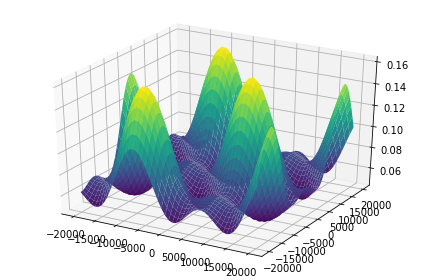

In [20]:
from sympy.plotting import plot3d
x_plotx = symbols('x')
y_ploty = symbols('y')
plot3d(H_allin_sub.subs({x:x_plotx,y:y_ploty,z:100}),(x_plotx,-20000,20000),(y_ploty,-20000,20000))

## 计算运动轨迹
因为是定常流场，所以流线和迹线是重合的(?)
所以直接使用流线的分布图进行绘制

In [21]:
# 全风速带入常数
V_allin_count = V_allin.subs({k:sym.pi/h,l:sym.pi/h,m:sym.pi/h}).subs({h:15000,M:15,S0:2.25*1e9/sym.pi**2,M:15})
V_allin_count

(-10.0*sin(N.x*pi/15000)*cos(N.y*pi/15000)*cos(N.z*pi/15000) + 10.0*sqrt(3)*sin(N.y*pi/15000)*sin(N.z*pi/15000)*cos(N.x*pi/15000) + 15*sin(sqrt(3)*pi*(N.z - 7500)/15000))*N.i + (10.0*sqrt(3)*sin(N.x*pi/15000)*sin(N.z*pi/15000)*cos(N.y*pi/15000) - 10.0*sin(N.y*pi/15000)*cos(N.x*pi/15000)*cos(N.z*pi/15000) + 15*cos(sqrt(3)*pi*(N.z - 7500)/15000))*N.j + (20.0*sin(N.z*pi/15000)*cos(N.x*pi/15000)*cos(N.y*pi/15000))*N.k

In [22]:
import numpy as np
x_count = np.linspace(0,10000,11)
y_count = np.linspace(0,10000,11)
z_count = np.linspace(0,1000,11)
N = CoordSys3D('N')
u_count = V_allin_count.dot(N.i)
v_count = V_allin_count.dot(N.j)
w_count = V_allin_count.dot(N.k)
# V_allin_count.subs({x:})

In [23]:
u_stream = np.empty([11,11,11])
v_stream = np.empty([11,11,11])
w_stream = np.empty([11,11,11])
for xind,xin in enumerate(np.linspace(0,100000,11)):
    for yind,yin in enumerate(np.linspace(0,100000,11)):
        for zind,zin in enumerate(np.linspace(0,10000,11)):
            u_stream[xind,yind,zind] = u_count.subs({x:xin,y:yin,z:zin}).evalf()
            v_stream[xind,yind,zind] = v_count.subs({x:xin,y:yin,z:zin}).evalf()
            w_stream[xind,yind,zind] = w_count.subs({x:xin,y:yin,z:zin}).evalf()
            

使用matplotlib画2D流图

Text(0.5, 1.0, 'y-z')

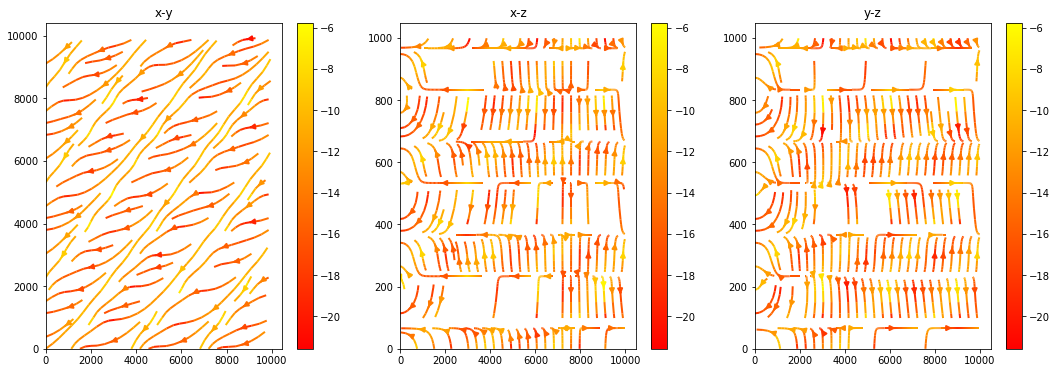

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(18, 6))
gs = gridspec.GridSpec(nrows=1, ncols=3)

ax1 = fig.add_subplot(gs[0])
strm = ax1.streamplot(x_count, y_count, u_stream[:,:,2], v_stream[:,:,2], color=u_stream[:,:,2], linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
ax1.set_title('x-y')

ax3 = fig.add_subplot(gs[1])
strm = ax3.streamplot(x_count, z_count, u_stream[:,0,:], w_stream[:,0,:], color=u_stream[:,:,2], linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
ax3.set_title('x-z')

ax5 = fig.add_subplot(gs[2])
strm = ax5.streamplot(y_count, z_count, v_stream[0,:,:], w_stream[0,:,:], color=u_stream[:,:,2], linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
ax5.set_title('y-z')